In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
# Load Dataset + fix messed up column headers
df = pd.read_csv('winequality-red-5.csv', delimiter=';', engine='python')
cols = df.columns[0]
cleaned_cols = [col.strip().strip('"') for col in raw_header.split(';')]

df = pd.read_csv('winequality-red-5.csv', delimiter=';', skiprows=1, header=None)
df.columns = cleaned_cols
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
df['quality'].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

# EDA

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

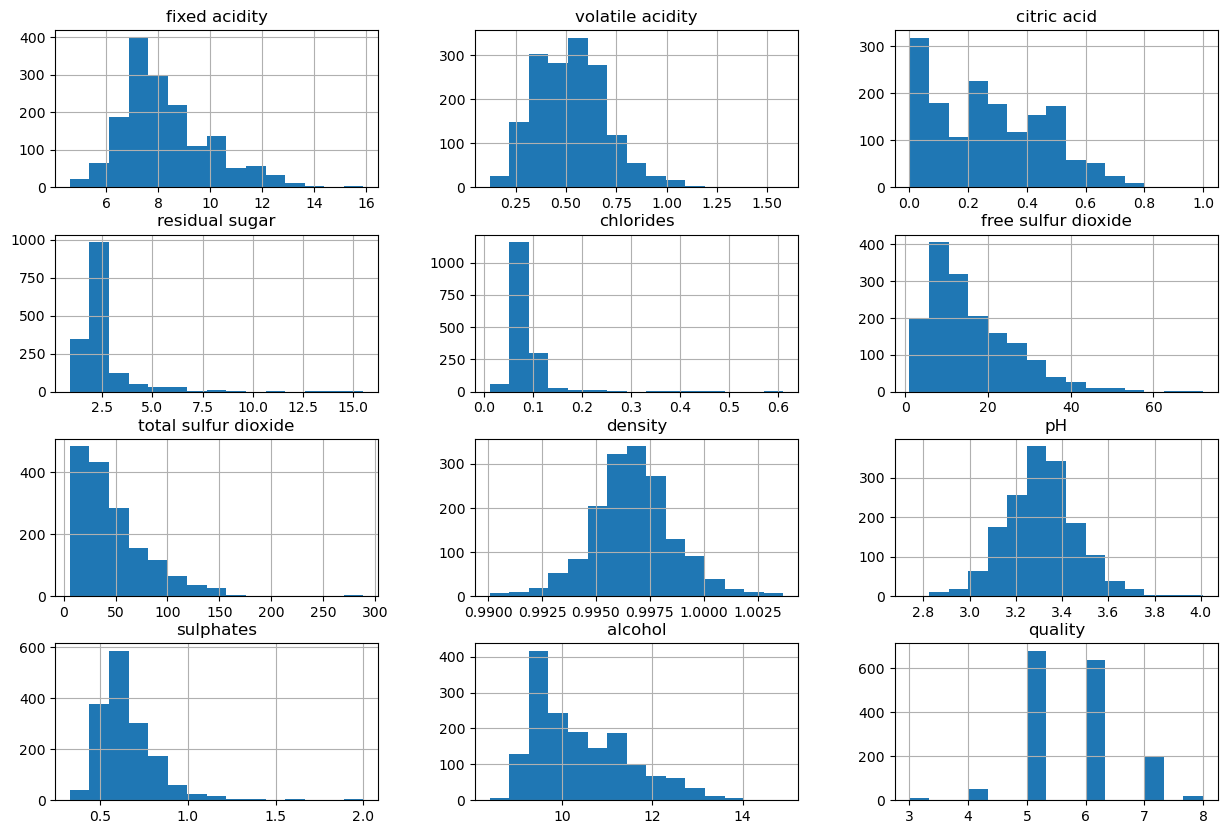

In [47]:
df.hist(bins=15, figsize=(15,10))

<Axes: >

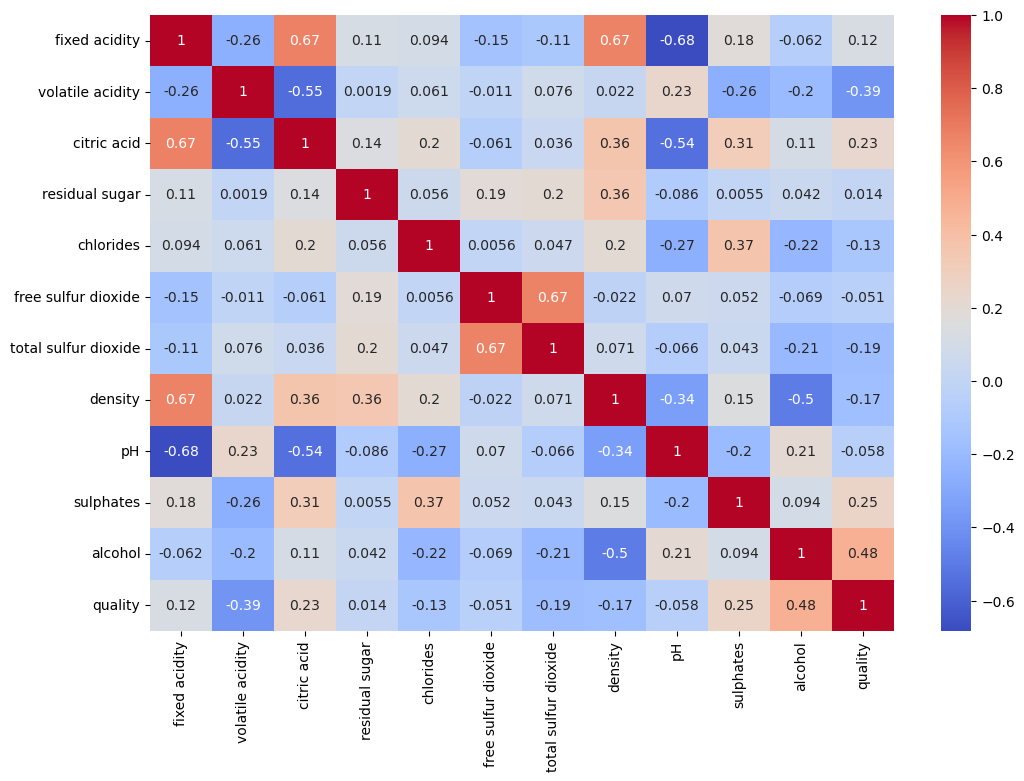

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='quality', ylabel='alcohol'>

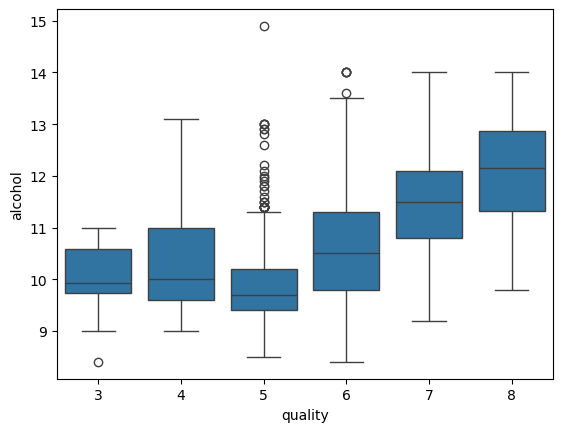

In [49]:
sns.boxplot(x='quality', y='alcohol', data=df)

# Preprocesssing

In [51]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y, # Preserve distribution of y within train and test groups
    random_state=42
)

scaler = StandardScaler() # Remove mean, scale to unit variance
# fit scalar on training data + apply to both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ANN Model

Main hyper-params to consider:
- num nodes and num nodes/layer
- regularization value --> MLPClassifier only supports L2 (alpha)
- learning rate
- early stopping
- batch size

In [109]:
#Multi-layer-perceptron --> feedforward
from sklearn.neural_network import MLPClassifier

# Simple MLP: one hidden layer of 100 neurons, ReLU activation
mlp = MLPClassifier(
    hidden_layer_sizes=(100,), # one hidden layer w 100 neurons
    activation='relu', # non-linear
    solver='adam', # optomizer for updating weights
    alpha=0.0001,
    max_iter=300,        # you can increase if it doesn't converge
    early_stopping=True, # automatically uses a validation split
    random_state=42
)

# Fit on training data
mlp.fit(X_train_scaled, y_train)

MLPClassifier(early_stopping=True, max_iter=300, random_state=42)

- Precision: % of predicted positives that ARE positive
- Recall: % of actual positives that WERE predicted as positive
- F1-score: Harmonic mean of precision and recall. 1 is perfect, 0 is bad.
    --> 0.6-0.7 is lowest acceptable, below that is weak
- Support: Number of true instances for each class in y_test.

- accuracy = correct pred / total pred
- macro avg = avg precision/recal/f-1 (respectively) over all classes. i.e the avgprecision is 0.29.
- weighted avg = like macro avg but takes into account # instances for each class --> helpful for imbalanced classes

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = mlp.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.59      0.80      0.68       136
           6       0.54      0.48      0.51       128
           7       0.59      0.33      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.57       320
   macro avg       0.29      0.27      0.27       320
weighted avg       0.54      0.57      0.55       320



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Interpretation: 
- 57% of all preds were correct
- 3,4,8 had 0 correct classifications --> model biased to majority classes
- Class 5 has highest support AND best performance --> indicates bias to support
- Class 6 has pretty balanced precision/recal
- class 7 had poor recall, meaning it MISSED many of its instances

- weighted averages ~ double macro averages means bias to suppport. Accounting for weight gives better performance so higher weighted classes do better.

Options going forward: 
- use resampling techniques
- try class weighting (i.e class_weight="balanced")

In [111]:
print("Pred      3    4    5    6    7    8")
confusion_matrix(y_test, y_pred)

Pred      3    4    5    6    7    8


array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,  11,   0,   0,   0],
       [  0,   0, 109,  25,   2,   0],
       [  0,   0,  60,  62,   6,   0],
       [  0,   0,   3,  24,  13,   0],
       [  0,   0,   0,   2,   1,   0]])

- Rows correspond to true class
- columns correspond to predicted class
- values on the main diagonal show correct predictons for each class
- values OFF diagonal show missclassifications
- Tells you which classes were missclassified as what

Observations:
- class 3 (2 total obs.) fully missclassified as one 5 and one 6
- class 4 entirely missclassified as 5
- class 5 had allmost all missclassifications (25/27) as class 6
- class 6 had majority missclassifications (60/66) as class 5
- class 7 had majority of missclassifications (24/27) as class 6
- class 8 (2 total obs.) full missclassified as one 7 and two 6

Interpretation:
- Seems to be an ordinal relationship between classes
- most missclassifications are as 5 or 6 because they dominate training of model

Grid search for optomizing:
- hidden layer sizes (both nodes and nodes/layer)
- alpha
- learning rate

Method for Grid Search:
1) runa  corase grid covering a broad range of architectures
2) pick the beset 2-3 architectures
3) Fine tune around the best architectures to find the optimal combo
4) once you know roughly the region, switch to randomized search to sample more combos.
5) pick the simplest model that is within 1 standard error of hte best score

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    # 1–3 hidden layers, neurons tapering or constant
    'hidden_layer_sizes': [
        (50,),       # small single layer
        (100,),      # medium single layer
        (150,),      # larger single layer
        (100, 50),   # two layers, tapered
        (150, 75),   # two layers, larger
        (100, 50, 25),# three layers, tapered
        (200, 100)   # two layers, wider
    ],
    # L2 penalty
    'alpha': [1e-5, 1e-4, 1e-3],
    # initial learning rate
    'learning_rate_init': [1e-4, 1e-3, 1e-2],
    'solver': ['adam'] 
}

grid = GridSearchCV(
    estimator=MLPClassifier(
        max_iter=500,
        early_stopping=True,
        random_state=42
    ),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best params: {'alpha': 1e-05, 'hidden_layer_sizes': (150, 75), 'learning_rate_init': 0.01, 'solver': 'adam'}
Best CV accuracy: 0.6090533088235295


In [113]:
best_mlp = grid.best_estimator_
y_pred_best = best_mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.73      0.54      0.62       136
           6       0.55      0.75      0.63       128
           7       0.60      0.60      0.60        40
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.31      0.32      0.31       320
weighted avg       0.61      0.61      0.59       320



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [114]:
param_grid_fine = {
  'hidden_layer_sizes': [(150,75), (175,90), (125,60)],
  'alpha': [1e-6, 1e-5, 5e-5],
  'learning_rate_init': [5e-3, 1e-2, 2e-2]
}

fine_grid = GridSearchCV(
    estimator=MLPClassifier(
        max_iter=500,
        early_stopping=True,
        random_state=42
    ),
    param_grid=param_grid_fine,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

fine_grid.fit(X_train_scaled, y_train)

print("Best params:", fine_grid.best_params_)
print("Best CV accuracy:", fine_grid.best_score_)

Best params: {'alpha': 5e-05, 'hidden_layer_sizes': (125, 60), 'learning_rate_init': 0.02}
Best CV accuracy: 0.61453125


In [115]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    # sample from a small set of nearby architectures
    'hidden_layer_sizes': [
        (125, 60),
        (150, 75),
        (100, 50),
        (150, 60),
        (125, 75),
        (125, 60, 30)   # try a small 3-layer net too
    ],
    # log-uniform over [1e-6, 1e-3] around your best α=5e-5
    'alpha': loguniform(1e-6, 1e-3),
    # log-uniform over [1e-3, 5e-2] around your best lr=0.02
    'learning_rate_init': loguniform(1e-3, 5e-2)
}

rs = RandomizedSearchCV(
    estimator=MLPClassifier(
        solver='adam',
        max_iter=500,
        early_stopping=True,
        random_state=42
    ),
    param_distributions=param_dist,
    n_iter=100,           # 20 random samples
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# 3) Run the search on your training data
rs.fit(X_train_scaled, y_train)

print("Best params:", rs.best_params_)
print("Best CV accuracy:", rs.best_score_)

Best params: {'alpha': 0.0007274208264938345, 'hidden_layer_sizes': (125, 75), 'learning_rate_init': 0.031697852695096264}
Best CV accuracy: 0.6129748774509804


Random search's best model doesn't beat fine-grid's best model, but can compare them both to the test set anyway.

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

best_fine_mlp = fine_grid.best_estimator_  # already .fit on X_train_scaled
y_pred_fine = best_fine_mlp.predict(X_test_scaled)

print("Fine-grid MLP (125,60; α=5e-5; lr=0.02)")
print(classification_report(y_test, y_pred_fine))
print("Macro-F1:", f1_score(y_test, y_pred_fine, average='macro'))
print()

best_rs_mlp = rs.best_estimator_
y_pred_rs = best_rs_mlp.predict(X_test_scaled)

print("Random-search MLP", rs.best_params_)
print(classification_report(y_test, y_pred_rs))
print("Macro-F1:", f1_score(y_test, y_pred_rs, average='macro'))


Fine-grid MLP (125,60; α=5e-5; lr=0.02)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.70      0.64      0.67       136
           6       0.54      0.77      0.64       128
           7       0.75      0.23      0.35        40
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.33      0.27      0.27       320
weighted avg       0.61      0.61      0.58       320

Macro-F1: 0.2749127435622612

Random-search MLP {'alpha': 0.0007274208264938345, 'hidden_layer_sizes': (125, 75), 'learning_rate_init': 0.031697852695096264}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.63      0.73      0.68       136
           6       0.57      0.50      0.5

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

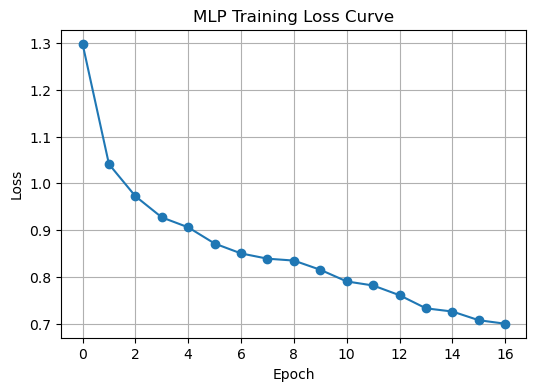

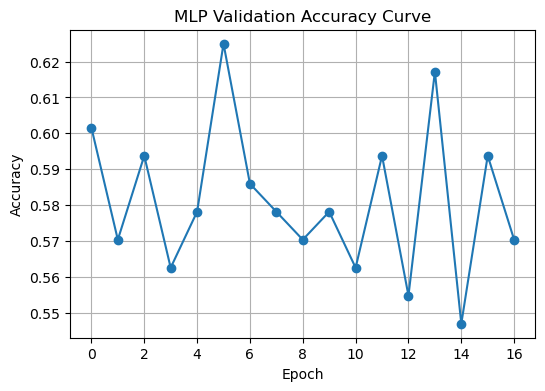

In [86]:
mlp = grid.best_estimator_
# 1. Plot training loss vs. epoch
plt.figure(figsize=(6,4))
plt.plot(mlp.loss_curve_, marker='o')
plt.title('MLP Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 2. (Optional) If you enabled early_stopping=True, you can also plot validation accuracy:
if hasattr(mlp, 'validation_scores_'):
    plt.figure(figsize=(6,4))
    plt.plot(mlp.validation_scores_, marker='o')
    plt.title('MLP Validation Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()


Training Loss Interpretation:
- Training loss curve shows smooth, steady decline. This means MLP is learning on data and minimizing training set loss.
- No spikes or re-increases means optomizer (adam) is working well

Validation Accuracy Interpretation:
- osciales around 0.57-0.6 with peaks at epoch 5 and 13. No clear upward trend means that after epoch 5 its not improving on test data, but only on training data.
- High variance indicates overfitting. (or possibly small validation set per epoch or class imbalance making accuracy noisy)